# Spotted bullhead Occurrence Records Summary

### Set Variables - fill out stuff in this cell.  
Notes:
default_coordUncertainty -- coordinateUncertaintyInMeters is often not provided.  Here is an option to use a default.  If you don't want anything entered, set this equal to False (boolean, not string).

In [1]:
configDir = 'T:/Gap/Data/'  # Path to folder where you saved your wildlifeconfig file.
taxon_id = 'abby1'
summary_name = 'spottedbullhead'
gbif_req_id = 'test1'
gbif_filter_id = 'test1'
default_coordUncertainty = 3000       # Note above.

There is a bug with mpl_toolkits, the following code is a temp fix, hopefully.
https://stackoverflow.com/questions/52911232/basemap-library-using-anaconda-jupyter-notebooks-keyerror-proj-lib/54087410#54087410

In [2]:
import os
os.environ['PROJ_LIB'] = r'c:\Users\nmtarr\AppData\local\Continuum\miniconda3\envs\wrangler\Library\share'

### Setup - nothing to fill out in this cell

In [3]:
%matplotlib inline
import sqlite3
import pprint
import json
import pandas as pd
import numpy as np
pd.set_option('display.width', 600)
pd.set_option('display.max_colwidth', 30)
pd.set_option('display.max_rows', 150)
from IPython.display import Image
from pygbif import occurrences
import matplotlib.pyplot as plt
import os
from datetime import datetime
t1 = datetime.now()
import sys
sys.path.append(configDir)
import wranglerconfig as config
codeDir = config.codeDir
paramdb = config.paramdb
sys.path.append(codeDir)
import wrangler_functions as functions
outDir = config.workDir
spdb = outDir + taxon_id + gbif_req_id + gbif_filter_id + '.sqlite'
username = config.gbif_username
password = config.gbif_password
email = config.gbif_email
print("Notebook run " + str(t1))
print(spdb)
connjup = sqlite3.connect(paramdb)
cursorjup = connjup.cursor()
# Get some variables
years = connjup.execute("""SELECT years_range 
                           FROM gbif_requests WHERE request_id = '{0}'""".format(gbif_req_id)).fetchone()[0]
gap_id = connjup.execute("""SELECT gap_id
                            FROM taxa_concepts WHERE taxon_id = '{0}'""".format(taxon_id)).fetchone()[0]
common_name = connjup.execute("""SELECT common_name
                                 FROM taxa_concepts WHERE taxon_id = '{0}'""".format(taxon_id)).fetchone()[0]

Notebook run 2020-09-02 21:24:36.624987
T:/Occurrence_Records/abby1test1test1.sqlite


# Taxon Concept
Display species information from your wildlife-wrangler.sqlite database.

In [4]:
vals = cursorjup.execute("SELECT * FROM taxa_concepts WHERE taxon_id = '{0}';".format(taxon_id)).fetchall()[0]
cols = [x[1] for x in cursorjup.execute("PRAGMA table_info('taxa_concepts')").fetchall()]
sp_dict = dict(zip(cols, vals))
sp_df = pd.DataFrame.from_dict(sp_dict, orient='index', columns=['VALUE'])
sp_df.index.name = 'ATTRIBUTE'
print("TAXON CONCEPT RECORD")
print(sp_df)

TAXON CONCEPT RECORD
                                              VALUE
ATTRIBUTE                                          
taxon_id                                      abby1
fws_id                                         None
gap_id                                         None
itis_tsn                                     164047
gbif_id                                     2340987
ebird_id                                       None
common_name                        spotted bullhead
scientific_name               Ameiurus serracanthus
start_year                                     None
split_from                                     None
end_year                                       None
lumped_into                                    None
geometry                                       None
detection_distance_meters                         0
retro_misid_risk                               None
vetted_how                                        0
vetted_who                                 

# Filters
Display the parameters of the request filter set.  These are deployed during the step where records are retrieved from the API.

In [5]:
request_df = pd.read_sql_query(sql="SELECT * FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id), con=connjup)
print("THE REQUEST FILTER SET")
print(request_df.loc[0])

THE REQUEST FILTER SET
request_id          test1
source               GBIF
lat_range            None
lon_range            None
years_range     1999,2020
months_range         1,12
geoissue            False
coordinate           True
country                US
geometry                 
creator              None
notes                None
Name: 0, dtype: object


Display the parameters of the post-request filter set.  These are deployed after the records are retrieved from the API, but before they are stored in the output occurrence record sqlite database.

In [6]:
filter_df = pd.read_sql_query(sql="SELECT * FROM gbif_filters WHERE filter_id = '{0}'".format(gbif_filter_id), con=connjup)
print("THE POST REQUEST FILTER SET")
print(filter_df.loc[0])

THE POST REQUEST FILTER SET
filter_id                                   test1
dataset                                      GBIF
institutions_omit                             MCZ
collection_codes_omit                        None
datasets_omit                                None
has_coordinate_uncertainty                      0
max_coordinate_uncertainty                  10000
bases_omit                    MACHINE_OBSERVATION
sampling_protocols_omit                      None
issues_omit                                  None
duplicates_OK                               False
creator                                      None
notes                                        None
Name: 0, dtype: object


## Filter set justification

**default_coord_uncertainty:** 

**years_range:** 

**months_range:** 

**geoissue:** 

**coordinate:** 

**country:** 

**geometry:** 

**collection_codes_omit:** 

**institutions_omit:** 

**datasets_omit:** 

**has_coordinate_uncertainty:**

**max_coordinate_uncertainty:** 

**bases_omit:** 

**sampling_protocols_omit:** 

**issues_omit:** 

**duplicates:** 

In [7]:
functions.retrieve_gbif_occurrences(codeDir, taxon_id, paramdb, spdb, gbif_req_id, gbif_filter_id, 
                                    default_coordUncertainty, outDir, summary_name, username,
                                   password, email)

SPATIALITE_SECURITY set to relaxed
Created occurrence db: 0:00:00.293726
Got request params and sorted out geometry constraints: 0:00:00.002991
49 records available
Downloaded records: 0:00:01.654496
Summarized fields returned: 0:00:01.405767
Created summary table of request results: 0:00:00.032102
Performed post-request filtering: 0:00:00.006970
Calculated new columns, deleted some too: 0:00:00.013938
4 duplicate records dropped: 0:00:00.100557
Inserted records into table: 0:00:00.035842
Summarized unique values retained: 0:00:00.002986
Updated occurrences table geometry column: 0:00:00.014935
Buffered points: 0:00:00.220376
Exported shapefile: 0:00:00.248249

Records saved in T:/Occurrence_Records/abby1test1test1.sqlite


### Connect to output database, record species and filter info.

In [8]:
conn_occ= sqlite3.connect(spdb)
curs_occ = conn_occ.cursor()
sp_df.to_sql(name='taxon_concept', con=conn_occ, if_exists='replace')
request_df.to_sql(name=gbif_req_id, con=conn_occ, if_exists='replace')
filter_df.to_sql(name=gbif_filter_id, con=conn_occ, if_exists='replace')

### How many records made it through the filters?
This is the number that was actually saved in the occurrence record sqlite database.

In [9]:
record_count = curs_occ.execute("SELECT COUNT(occ_id) FROM occurrences WHERE taxon_id = '{0}'".format(taxon_id)).fetchone()
print(str(record_count[0]) + " records")

45 records


# Sources
#### Pre-filters

In [10]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sources = pd.read_sql(sql="SELECT * FROM pre_filter_source_counts;", con=conn_occ)
print(sources)

GBIF
                 institutionCode                 collectionCode                    datasetName   0
0                            AUM                           Fish                        UNKNOWN   1
1                          BISON  FWC - Freshwater Fishes of...  FWC - Freshwater Fishes of...   1
2                          BISON  Multistate Aquatic Resourc...  Multistate Aquatic Resourc...  31
3  Ohio State University - Fi...                         Fishes                        UNKNOWN   1
4                             UA                           UAIC  University of Alabama Icht...   1
5                             UF                           Fish                        UNKNOWN  11
6                    iNaturalist                   Observations  iNaturalist research-grade...   3


#### Post-filters

In [11]:
tables = cursorjup.execute("SELECT table_name FROM table_descriptions").fetchall()
tables = [x[0] for x in tables]

filter_sets = [gbif_req_id, gbif_filter_id]

sources = []
for s in filter_sets:
    s = s.strip()
    for tab in tables:
        columns = cursorjup.execute("SELECT column_name FROM column_descriptions WHERE table_name = '{0}'".format(tab)).fetchall()
        columns = [x[0] for x in columns]
        for col in columns:
            try:
                a = cursorjup.execute("SELECT source FROM {1} WHERE {2} = '{0}'".format(s, tab, col)).fetchone()[0]
                sources.append(a)
            except:
                pass
print(list(set(sources))[0])

sql = "SELECT institutionCode, collectionCode, datasetName, COUNT(occ_id) FROM occurrences GROUP BY institutionCode, collectionCode, datasetName;"
sources = pd.read_sql(sql=sql, con=conn_occ)
print(sources)

GBIF
                 institutionCode                 collectionCode                    datasetName  COUNT(occ_id)
0                            AUM                           Fish                        UNKNOWN              1
1                          BISON  FWC - Freshwater Fishes of...  FWC - Freshwater Fishes of...              1
2                          BISON  Multistate Aquatic Resourc...  Multistate Aquatic Resourc...             27
3  Ohio State University - Fi...                         Fishes                        UNKNOWN              1
4                             UA                           UAIC  University of Alabama Icht...              1
5                             UF                           Fish                        UNKNOWN             11
6                    iNaturalist                   Observations  iNaturalist research-grade...              3


# Bases
#### Pre-filter

In [12]:
bases = pd.read_sql(sql="SELECT value as basisOfRecord, count FROM pre_filter_value_counts WHERE attribute = 'bases';", con=conn_occ)
print(bases)

        basisOfRecord  count
0   HUMAN_OBSERVATION     35
1  PRESERVED_SPECIMEN     14


#### Post-filters

In [13]:
sql = "SELECT basisOfRecord, COUNT(occ_id) as count FROM occurrences GROUP BY basisOfRecord;"
bases = pd.read_sql(sql=sql, con=conn_occ)
print(bases)

        basisOfRecord  count
0   HUMAN_OBSERVATION     31
1  PRESERVED_SPECIMEN     14


# Protocols
#### Pre-filters

In [14]:
protocol = pd.read_sql(sql="SELECT value as samplingProtocol, count FROM pre_filter_value_counts WHERE attribute = 'samplingProtocols';", con=conn_occ)
print(protocol)

                samplingProtocol  count
0  Method: Electrofishing; SC...      1
1                        UNKNOWN     47
2                  hook and line      1


#### Post-filters

In [15]:
sql = "SELECT samplingProtocol, COUNT(occ_id) as count FROM occurrences GROUP BY samplingProtocol;"
print(pd.read_sql(sql=sql, con=conn_occ))

                samplingProtocol  count
0  Method: Electrofishing; SC...      1
1                        UNKNOWN     43
2                  hook and line      1


# Issues
#### Pre-filters

In [16]:
iss = pd.read_sql(sql="SELECT value as issues, count FROM pre_filter_value_counts WHERE attribute = 'issues';", con=conn_occ)
pd.set_option('display.max_colwidth', 80)
print(iss)

                                                                            issues  count
0   ['COORDINATE_REPROJECTED', 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT']      1
1                           ['COORDINATE_ROUNDED', 'GEODETIC_DATUM_ASSUMED_WGS84']     40
2                                                           ['COORDINATE_ROUNDED']      1
3  ['GEODETIC_DATUM_ASSUMED_WGS84', 'OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL...      1
4                                                 ['GEODETIC_DATUM_ASSUMED_WGS84']      5
5                                                                               []      1


#### Post-filters

In [17]:
sql = "SELECT issues, COUNT(occ_id) as count FROM occurrences GROUP BY issues;"
print(pd.read_sql(sql=sql, con=conn_occ))

                                                                          issues  count
0                                                                                     1
1        COORDINATE_REPROJECTED;OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT      1
2                                                             COORDINATE_ROUNDED      1
3                                COORDINATE_ROUNDED;GEODETIC_DATUM_ASSUMED_WGS84     36
4                                                   GEODETIC_DATUM_ASSUMED_WGS84      5
5  GEODETIC_DATUM_ASSUMED_WGS84;OCCURRENCE_STATUS_INFERRED_FROM_INDIVIDUAL_COUNT      1


# Descriptions of filtered records

### Locations

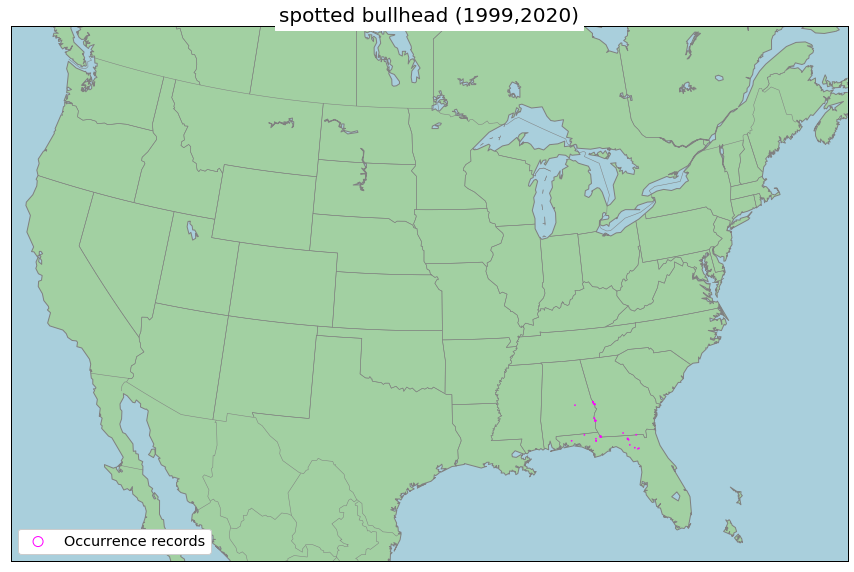

In [18]:
shp1 = {'file': '{0}{1}_polygons'.format(outDir, summary_name), 'column': None,
        'alias': 'Occurrence records', 'drawbounds': True, 'linewidth': .75, 'linecolor': 'magenta',
        'fillcolor': None, 'marker':'o'}

# Display occurrence polygons
map_these=[shp1]
    
title="{1} ({0})".format(years, common_name)
try:
    functions.MapShapefilePolygons(map_these=map_these, title=title)
except Exception as e:
    print("Unable to map:  " + str(e))

### Years represented

Text(0.5, 1.0, 'Occurrences per Year')

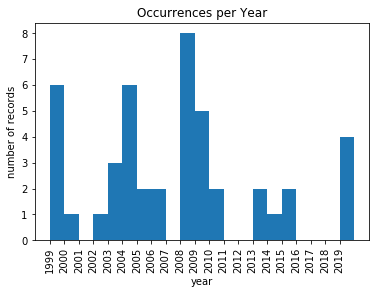

In [19]:
occ_years = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%Y', occurrenceDate) FROM occurrences").fetchall()]
years = connjup.execute("SELECT years_range FROM gbif_requests WHERE request_id = '{0}'".format(gbif_req_id)).fetchone()[0]
years = years.split(',')
yearsrng = list(range(int(years[0]), int(years[1]), 1))
binsnum = int(years[1]) - int(years[0])
plt.hist(occ_years, bins=binsnum)
plt.ylabel("number of records")
plt.xlabel("year")
plt.xticks(yearsrng, rotation=90)
plt.title("Occurrences per Year")

### Months represented

Text(0.5, 1.0, 'Occurrences per Month')

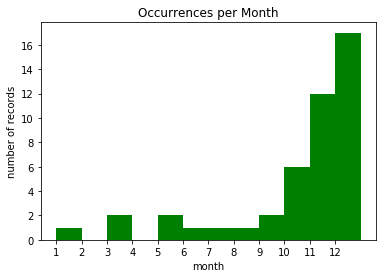

In [20]:
occ_months = [int(x[0]) for x in curs_occ.execute("SELECT strftime('%m', occurrenceDate) FROM occurrences").fetchall()]
plt.hist(occ_months, bins=range(1, 14), color="g")
plt.ylabel("number of records")
plt.xlabel("month")
plt.xticks(range(1, 13))
plt.title("Occurrences per Month")

### Distribution of coordinate uncertainty values

Text(0.5, 1.0, 'Coordinate Uncertainty')

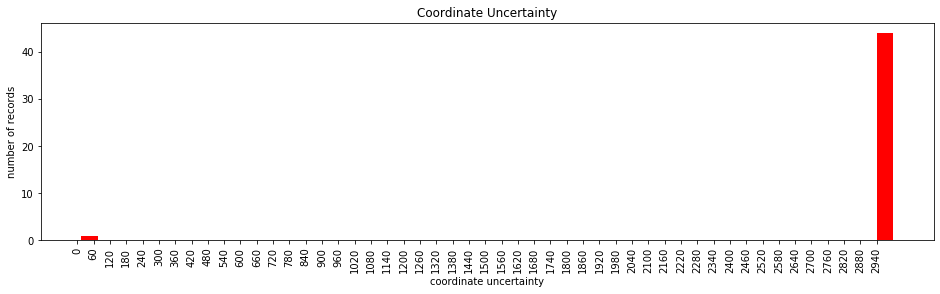

In [21]:
occ_cert = [int(x[0]) for x in curs_occ.execute("SELECT coordinateUncertaintyInMeters FROM occurrences").fetchall()]
maxi = np.max(occ_cert)
plt.figure(figsize=(16,4))
plt.hist(occ_cert, bins=50, color="r")
plt.xticks(range(0, maxi, int(maxi/50)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty")

Text(0.5, 1.0, 'Coordinate Uncertainty - Zoomed In')

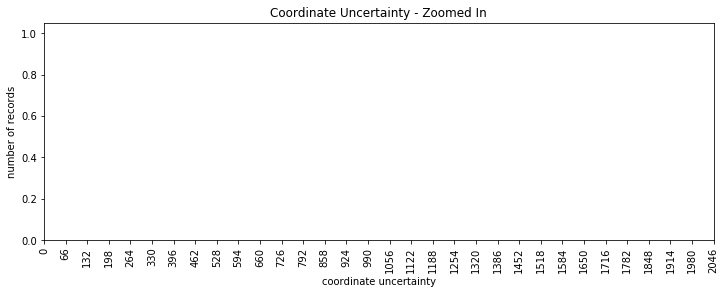

In [22]:
rng_max = 2000
occ_cert2 = [x for x in occ_cert if x <= rng_max]
plt.figure(figsize=(12,4))
plt.hist(occ_cert2, bins=30, color="m", align='mid')
plt.xticks(range(0, rng_max + 100, int(rng_max/30.)), rotation=90)
plt.ylabel("number of records")
plt.xlabel("coordinate uncertainty")
plt.title("Coordinate Uncertainty - Zoomed In")

### Establishment means reported

In [23]:
establishment = curs_occ.execute("SELECT vals FROM unique_values WHERE field = 'establishment' AND step = 'filter';").fetchall()[0]
for est in establishment:
    est = est.replace('[', '').strip().replace(']', '').replace("'", "")
    print(est)

UNKNOWN, NATIVE


### Identification qualifiers included

In [24]:
quali = curs_occ.execute("SELECT DISTINCT vals FROM unique_values WHERE field = 'IDqualifier' AND step = 'filter';").fetchall()[0]
for q in quali:
    q = q.replace('[', '').strip().replace(']', '').replace("'", "")
    print(q)

UNKNOWN


### Remarks included

In [25]:
remarks = curs_occ.execute("SELECT DISTINCT remarks FROM occurrences;").fetchall()
if len(remarks) <= 20:
    try:
        for rem in remarks:
            if rem[0][0:1] == ';':
                print(rem[0][2:])
            else:
                print(rem[0])
    except:
        pass
else:
    print("More than 20 remarks, consult the occurrence database.")

UNKNOWN;UNKNOWN;UNKNOWN;UNKNOWN
Coosa River 2.5 miles below Jordan Dam (Cousin's site);UNKNOWN;UNKNOWN;UNKNOWN
Chattahoochee River, left bank below Oliver Dam;Kept in aquarium in Sammons� lab for two day before they died.;UNKNOWN;UNKNOWN
Choctawhatchee River u.s. Corey ferry boat ramp (11.1 miles N of Westville FL);UNKNOWN;UNKNOWN;UNKNOWN
Withlacoechee River, at Old Quitman highway bridge;Locality data taken from specimen label. No field notes provided. -A Varandas/July2004;UNKNOWN;UNKNOWN
Yellow River south of Wilkenson Bluff and north of Log Lake;Electrofished for 5 miles. Data taken from field notes. J Seitz/December2005;UNKNOWN;UNKNOWN
Rocky Creek just E of St. Rte. 71, ca. 0.4 mi NNW junction with Co. Rte. 264 and ca. 9.2 mi SSE of Marianna;UNKNOWN;UNKNOWN;UNKNOWN
Chipola River, boat ramp at Johnny Boy Landing, 4.6 km WSW of Altha, FL;UNKNOWN;UNKNOWN;UNKNOWN
Chipola River upstream of St. Rt. 20 (Clarkesville Ramp), 3.3 miles SW of Altha, FL;A. rostrata, M. melanops, and A. calva w

### Attributes returned for the records in the request (pre-filters)

In [26]:
fields_summary = pd.read_sql("SELECT * FROM gbif_fields_returned", conn_occ)#, index_col='index')
fields_summary.index.name = 'Field'
pd.set_option('display.max_rows', 250)
print(fields_summary)

                                  attribute  included(n)  populated(n)
Field                                                                 
0                       acceptedNameUsageID           31            31
1                    acceptedScientificName           49            49
2                          acceptedTaxonKey           49            49
3                              accessRights            1             1
4                             basisOfRecord           49            49
5                     bibliographicCitation            1             1
6                             catalogNumber           49            49
7                                     class           49            49
8                                  classKey           49            49
9                            collectionCode           49            49
10                             collectionID           32            32
11                                continent           44            44
12    

### Runtime

In [27]:
t2 = datetime.now()
print(t2 - t1)

0:00:08.870973
